In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Task 2
#How many features (attributes) and instances exist, and what data types are these?
MHR_df=pd.read_csv("Maternal Health Risk Data Set.csv")
MHR_df.info()
#Provide summary statistics of the continuous numerical features.
MHR_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

In [3]:
#Perform an initial exploration of the provided dataset to assess its cleanliness. 
print("The number of missing values in this dataset are:")
print(MHR_df.isnull().sum())
print("\nThe number of duplicates in this dataset are:", MHR_df.duplicated().sum())

The number of missing values in this dataset are:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

The number of duplicates in this dataset are: 562


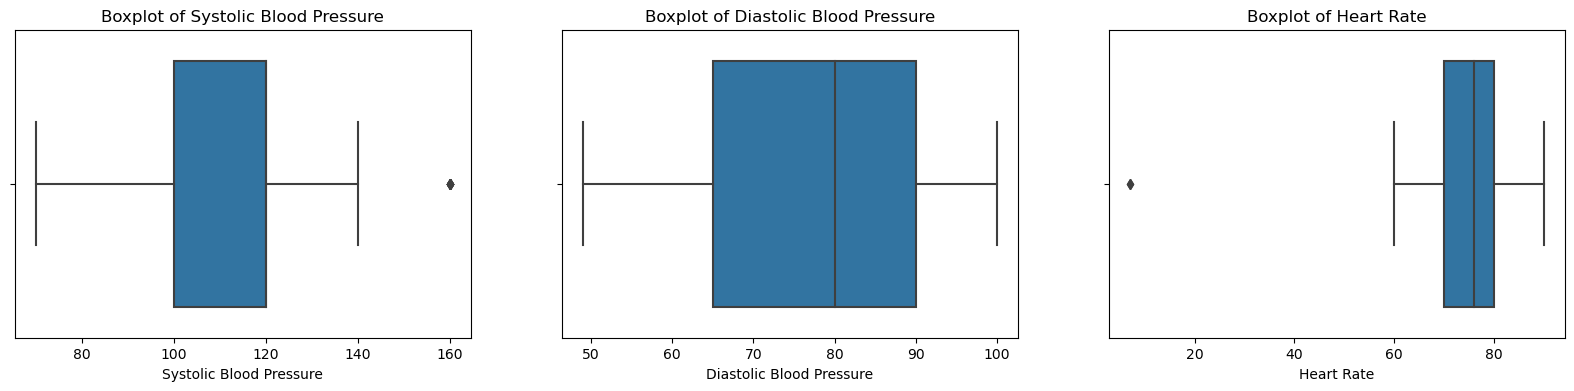

In [4]:
#Illustrate the features of your dataset using meaningful boxplots, histograms and grouped scatter plots

#boxplots:
fig, axes = plt.subplots(1, 3, figsize=(20,4))

sns.boxplot(data=MHR_df, x="SystolicBP", ax=axes[0])
axes[0].set_xlabel("Systolic Blood Pressure")
axes[0].set_title("Boxplot of Systolic Blood Pressure")

sns.boxplot(data=MHR_df, x="DiastolicBP", ax=axes[1])
axes[1].set_xlabel("Diastolic Blood Pressure")
axes[1].set_title("Boxplot of Diastolic Blood Pressure")

sns.boxplot(data=MHR_df, x="HeartRate", ax=axes[2])
axes[2].set_xlabel("Heart Rate")
axes[2].set_title("Boxplot of Heart Rate")
plt.show()

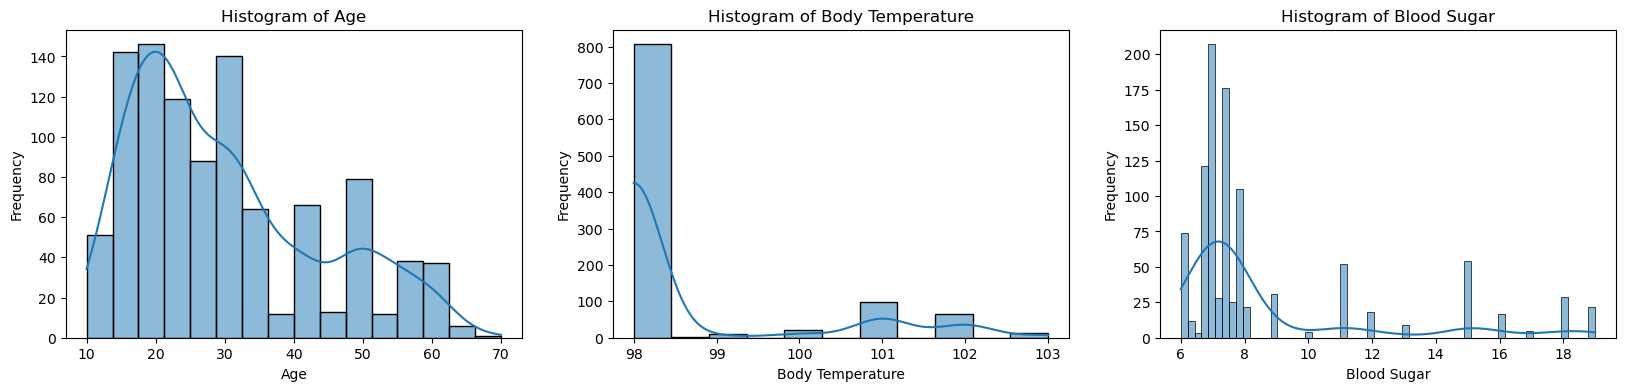

In [5]:
#histograms:
fig, axes = plt.subplots(1, 3, figsize=(20,4))

sns.histplot(data=MHR_df, x="Age", kde=True, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Age")

sns.histplot(data=MHR_df, x="BodyTemp", kde=True, ax=axes[1])
axes[1].set_xlabel("Body Temperature")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Body Temperature")

sns.histplot(data=MHR_df, x="BS", kde=True, ax=axes[2])
axes[2].set_xlabel("Blood Sugar")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Histogram of Blood Sugar")
plt.show()

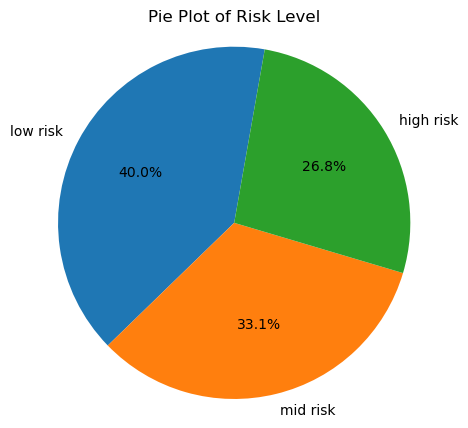

In [6]:
#piechart
genre_counts = MHR_df["RiskLevel"].value_counts()

genre_proportions = genre_counts / genre_counts.sum()

plt.figure(figsize=(5, 5))
plt.pie(genre_proportions, labels=genre_proportions.index, 
autopct="%1.1f%%", startangle=80)

plt.title("Pie Plot of Risk Level")
plt.axis("equal")
plt.show()

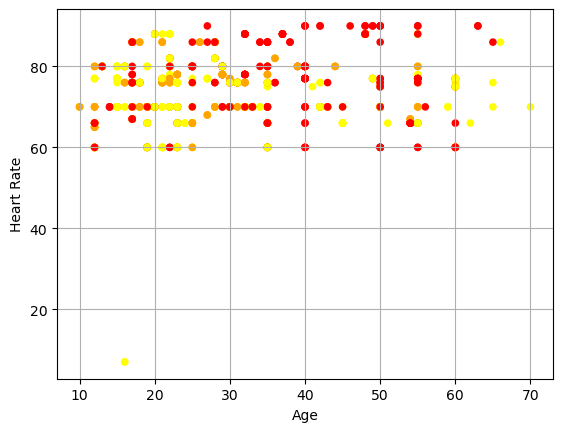

In [7]:
#Grouped scatter plots: Age vs HeartRate grouped by RiskLevel 
colors = {'low risk': 'yellow', 'mid risk': 'orange', 'high risk': 'red'}
color_list = [colors[risk_level] for risk_level in MHR_df['RiskLevel']]
ax = MHR_df.plot.scatter('Age', 'HeartRate', c=color_list, grid=True)
ax.set_ylabel('Heart Rate')
plt.show()

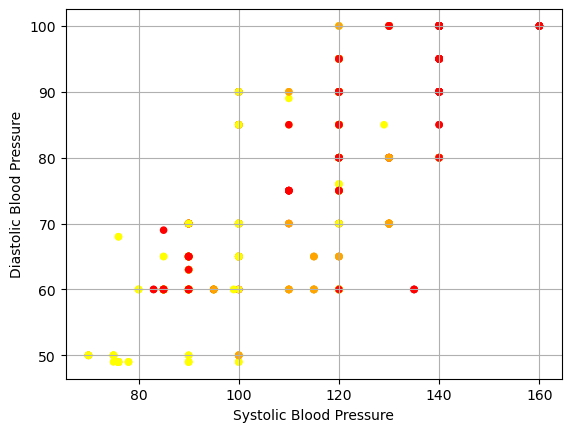

In [8]:
#Grouped scatter plots: SystolicBP vs DiastolicBP grouped by RiskLevel 
colors = {'low risk': 'yellow', 'mid risk': 'orange', 'high risk': 'red'}
color_list = [colors[risk_level] for risk_level in MHR_df['RiskLevel']]
ax = MHR_df.plot.scatter('SystolicBP', 'DiastolicBP', c=color_list, grid=True)
plt.xlabel('Systolic Blood Pressure')
ax.set_ylabel('Diastolic Blood Pressure')
plt.show()

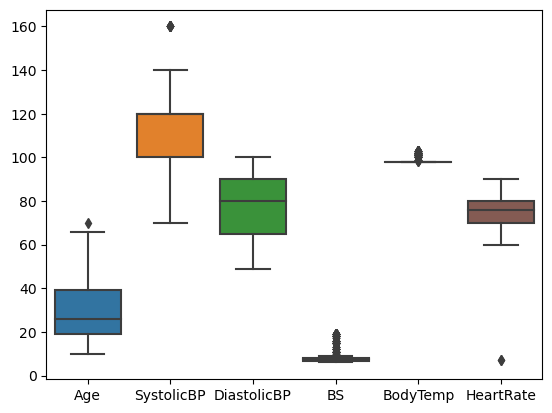

In [9]:
#Task 3
#Report your preprocessing steps
#viewing outliers 
sns.boxplot(data = MHR_df)
plt.show()

In [10]:
#removing outliers
from scipy.stats import zscore

numerical = MHR_df.select_dtypes(include=['number'])

z_scores = zscore(numerical)

threshold = 3

clean_df = MHR_df[(np.abs(z_scores) < threshold).all(axis=1)]

In [11]:
#Viewing duplicates to see if they are informative or unnecessary 
pd.set_option('display.max_rows', None)
duplicates = clean_df[clean_df.duplicated()]
print(duplicates)

      Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.00      98.0         70   mid risk
72     19         120           80   7.00      98.0         70   mid risk
97     19         120           80   7.00      98.0         70   mid risk
106    50         140           90  15.00      98.0         90  high risk
107    25         140          100   6.80      98.0         80  high risk
118    32         140          100   7.90      98.0         78  high risk
119    30         140          100  15.00      98.0         70  high risk
129    48         120           80  11.00      98.0         88  high risk
131    32         140           90  18.00      98.0         88  high risk
132    35         140          100   7.50      98.0         66  high risk
133    54         140          100  15.00      98.0         66  high risk
161    21          90           65   7.50      98.0         76   low risk
162    18          90           60   7

In [12]:
print("The number of duplicates in this dataset after:", clean_df.duplicated().sum())

The number of duplicates in this dataset after: 538


In [13]:
cleaned_df = clean_df.drop_duplicates(inplace=False)
print("The number of duplicates in this cleaned dataset are", cleaned_df.duplicated().sum())

The number of duplicates in this cleaned dataset are 0


In [14]:
#assigning target and predictor variables 
pd.reset_option('display.max_rows')
predictors = cleaned_df.iloc[:, : - 1]
print(predictors)
target = cleaned_df['RiskLevel']
print(target)

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0     25         130           80  15.0      98.0         86
1     35         140           90  13.0      98.0         70
2     29          90           70   8.0     100.0         80
3     30         140           85   7.0      98.0         70
4     35         120           60   6.1      98.0         76
..   ...         ...          ...   ...       ...        ...
673   12         100           50   6.4      98.0         70
674   15         100           60   6.0      98.0         80
703   15         100           49   7.6      98.0         77
704   12         100           50   6.0      98.0         70
705   21         100           50   6.8      98.0         60

[439 rows x 6 columns]
0      high risk
1      high risk
2      high risk
3      high risk
4       low risk
         ...    
673     mid risk
674     low risk
703     low risk
704     mid risk
705     low risk
Name: RiskLevel, Length: 439, dtype: object


In [39]:
#train and test splits with stratification 
X_train, X_test, y_train, y_test = train_test_split(predictors, target,test_size=.3)

In [40]:
#before optimising decision tree classification model
#setting 'max_depth' = 8 
dt_opt=DecisionTreeClassifier(max_depth=8,random_state=47)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes before optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(figsize=(20, 10), dpi=800)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the Maternal Health Risks features using max depth=8")
plt.show()

#display model summary report 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1 score of our model with Decision Tree :", '%.2f'%f1)

Number of tree nodes before optimizing max depth:  107


Accuracy score of our model with Decision Tree: 0.67
Precision score of our model with Decision Tree : 0.67
Recall score of our model with Decision Tree : 0.67
F1 score of our model with Decision Tree : 0.67


max_depth=1 Average 10-Fold Cross Validation Score:0.6720401691331925 Node count:3
max_depth=2 Average 10-Fold Cross Validation Score:0.7084038054968288 Node count:7
max_depth=3 Average 10-Fold Cross Validation Score:0.6970930232558139 Node count:15
max_depth=4 Average 10-Fold Cross Validation Score:0.7085095137420719 Node count:25
max_depth=5 Average 10-Fold Cross Validation Score:0.7062896405919663 Node count:37
max_depth=6 Average 10-Fold Cross Validation Score:0.7108350951374207 Node count:59
max_depth=7 Average 10-Fold Cross Validation Score:0.6290169133192389 Node count:81
max_depth=8 Average 10-Fold Cross Validation Score:0.6289112050739958 Node count:107
max_depth=9 Average 10-Fold Cross Validation Score:0.6153276955602536 Node count:129


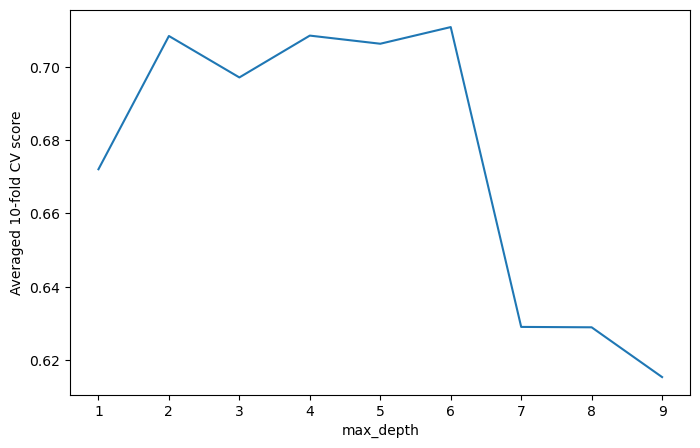

In [41]:
#10 fold cross-validation score for 'max_depth':
dt=DecisionTreeClassifier(random_state=47)
cv= cross_val_score(dt,predictors,target,cv=10)

maxdepth_cv=[]
node_counts=[]
for k in range(1, 10, 1):
    dt=DecisionTreeClassifier(max_depth=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold Cross Validation Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
#Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(1,10,1))
k=range(1,10,1)
plt.plot(k,maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

In [42]:
#optimising 'max_depth' = 6
dt_opt=DecisionTreeClassifier(max_depth=6,random_state=47)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(figsize=(20, 10), dpi=800)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the Maternal Health Risks features using max depth=6")
plt.show()

#display model summary report 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1 score of our model with Decision Tree :", '%.2f'%f1)

Number of tree nodes after optimizing max depth:  59


Accuracy score of our model with Decision Tree: 0.73
Precision score of our model with Decision Tree : 0.73
Recall score of our model with Decision Tree : 0.73
F1 score of our model with Decision Tree : 0.73


Number of tree nodes after optimizing max depth:  11


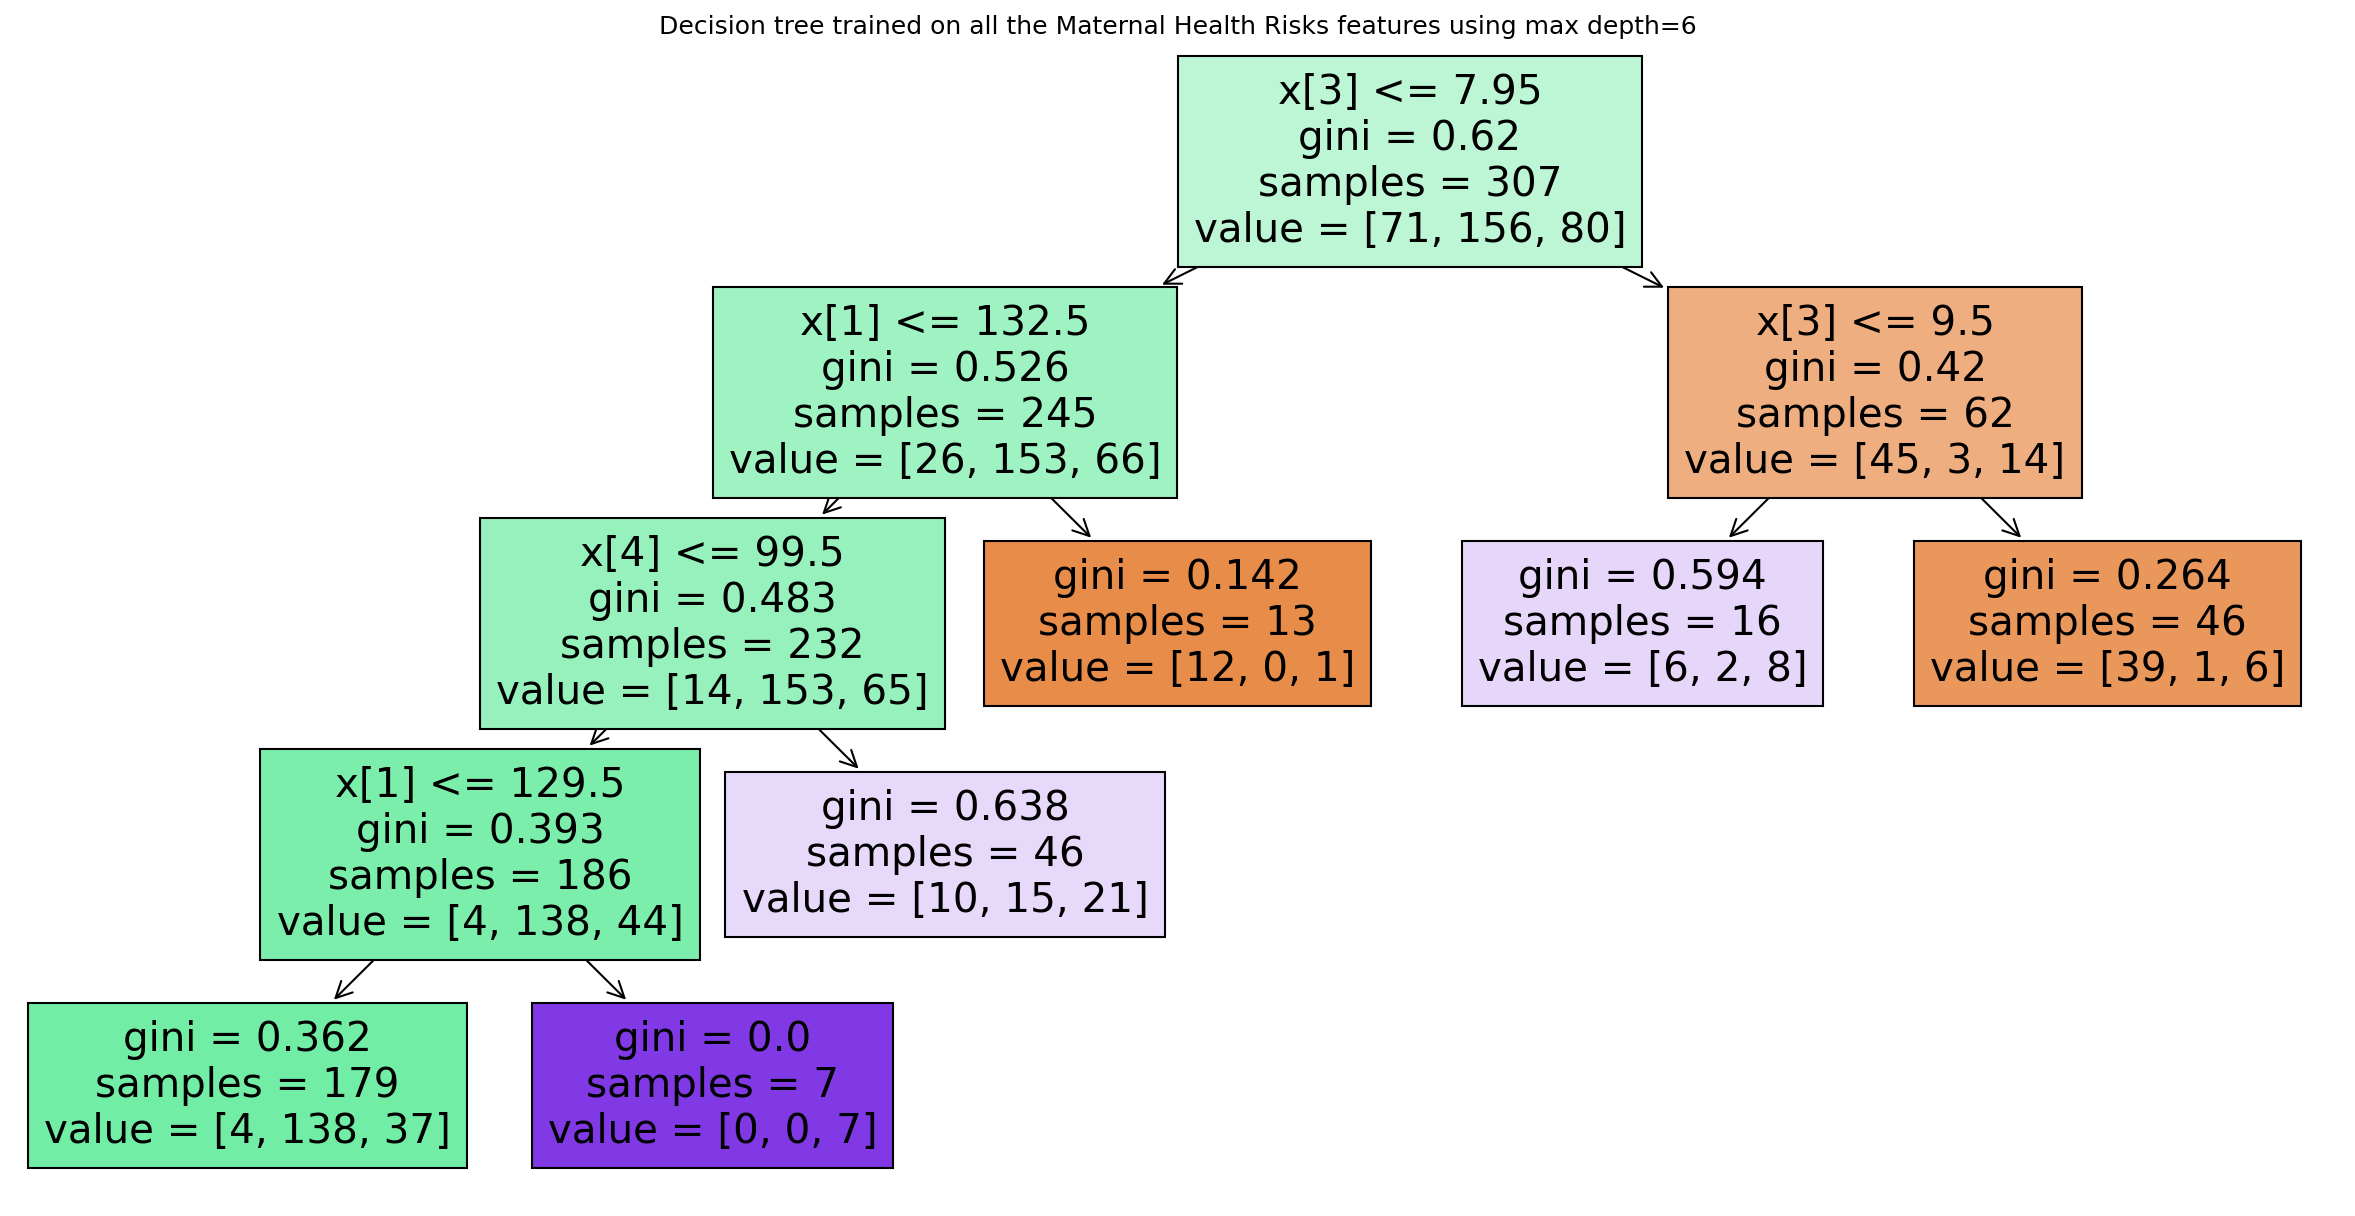

Accuracy score of our model with Decision Tree: 0.73
Precision score of our model with Decision Tree : 0.73
Recall score of our model with Decision Tree : 0.73
F1 score of our model with Decision Tree : 0.73


In [56]:
#experimenting with 'max_leaf_nodes' = 10 with optimal 'max_depth'
dt_opt=DecisionTreeClassifier(max_depth=6,random_state=47, max_leaf_nodes=6)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(figsize=(20, 10), dpi=150)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the Maternal Health Risks features using max depth=6")
plt.show()

#displaying 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1 score of our model with Decision Tree :", '%.2f'%f1)

max_leaf_nodes=2 Average 10-Fold CV Score:0.6720401691331925 Node count:3
max_leaf_nodes=3 Average 10-Fold CV Score:0.7084038054968288 Node count:5
max_leaf_nodes=4 Average 10-Fold CV Score:0.7084566596194503 Node count:7
max_leaf_nodes=5 Average 10-Fold CV Score:0.7243657505285412 Node count:9
max_leaf_nodes=6 Average 10-Fold CV Score:0.7289112050739958 Node count:11
max_leaf_nodes=7 Average 10-Fold CV Score:0.7311839323467231 Node count:13
max_leaf_nodes=8 Average 10-Fold CV Score:0.7220930232558139 Node count:15
max_leaf_nodes=9 Average 10-Fold CV Score:0.7152748414376321 Node count:17
max_leaf_nodes=10 Average 10-Fold CV Score:0.7084566596194503 Node count:19


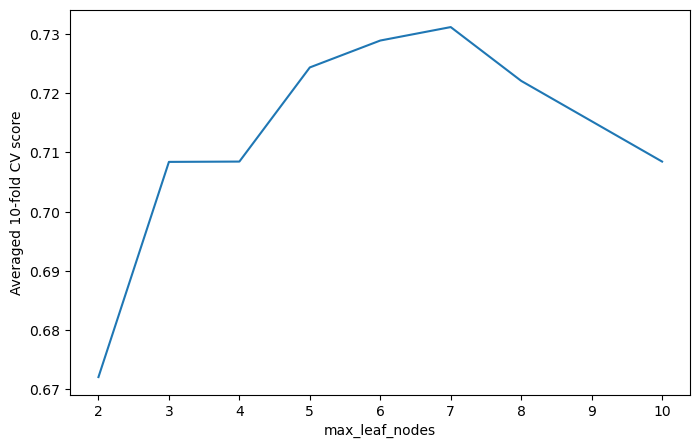

In [44]:
#10 fold cross-validation score for 'max_leaf_nodes':
cv= cross_val_score(dt,X_train,y_train,cv=10)

maxleaf_cv=[]
node_counts=[]

for k in range(2, 11):
    dt=DecisionTreeClassifier(max_leaf_nodes=k,random_state=47)
    dt.fit(X_train,y_train)
    #predict=dt.predict(X_test)
    cv= cross_val_score(dt, predictors, target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_leaf_nodes={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxleaf_cv.append(np.mean(cv))
    node_counts.append(nodecount) 
    
#Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(2, 11))
k=range(2, 11)
plt.plot(k,maxleaf_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

Number of tree nodes after optimizing max depth:  13


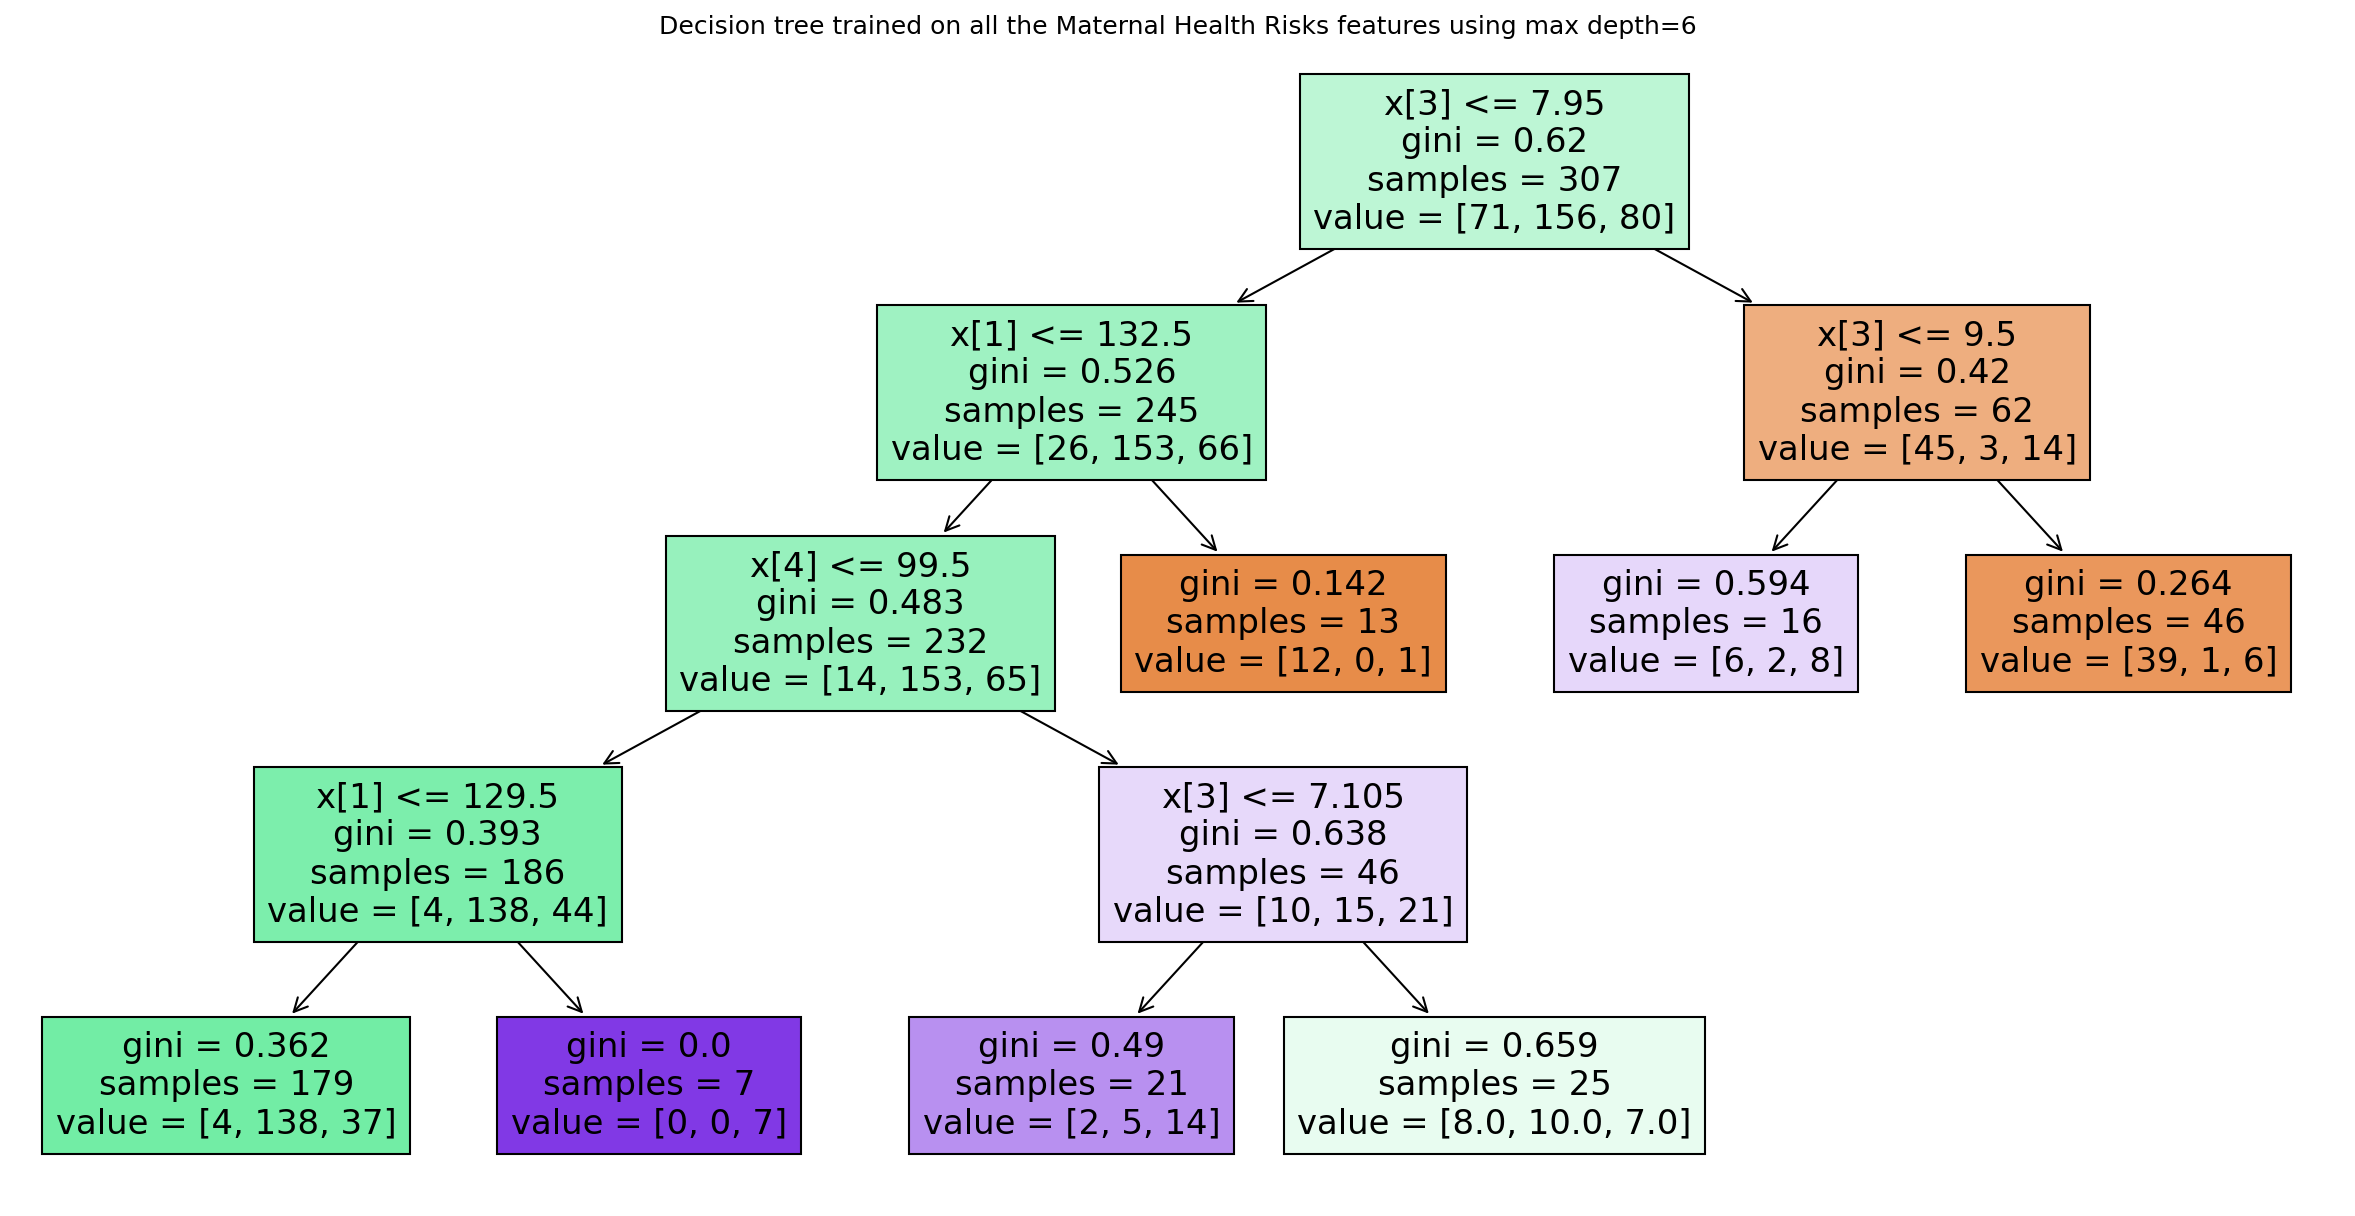

Accuracy score of our model with Decision Tree: 0.74
Precision score of our model with Decision Tree : 0.74
Recall score of our model with Decision Tree : 0.74
F1 score of our model with Decision Tree : 0.74


In [45]:
#Final optimised classification tree 
dt_opt=DecisionTreeClassifier(max_depth=6,random_state=47, max_leaf_nodes=7)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(figsize=(20, 10), dpi=150)
tree.plot_tree(dt_opt_fit,filled=True)
plt.title("Decision tree trained on all the Maternal Health Risks features using max depth=6")
plt.show()

#displaying 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1 score of our model with Decision Tree :", '%.2f'%f1)

In [57]:
#Find the feature importance based on the final classification model
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(dt_opt.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
print(importances)

       Feature  Importance
3           BS       0.549
1   SystolicBP       0.320
4     BodyTemp       0.132
0          Age       0.000
2  DiastolicBP       0.000
5    HeartRate       0.000


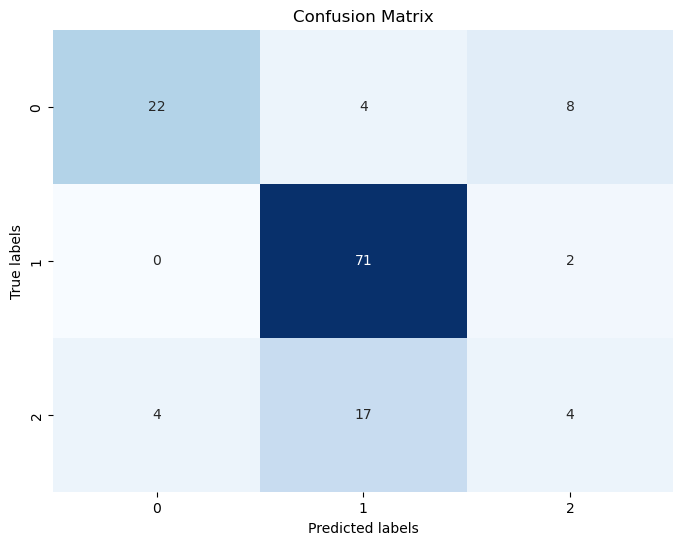

Accuracy score of our model with Decision Tree: 0.73
Precision score of our model with Decision Tree : 0.73
Recall score of our model with Decision Tree : 0.73
F1 score of our model with Decision Tree : 0.73


In [58]:
#the Confusion Matrix 
cm = confusion_matrix(y_test, predict_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#displaying model summary report 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of our model with Decision Tree :", '%.2f'%precision)
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of our model with Decision Tree :", '%.2f'%recall)
f1 = f1_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("F1 score of our model with Decision Tree :", '%.2f'%f1)